In [2]:
!pip install --upgrade pycaret --quiet

     |████████████████████████████████| 301 kB 4.3 MB/s 
     |████████████████████████████████| 114 kB 34.4 MB/s 
     |████████████████████████████████| 2.0 MB 34.8 MB/s 
     |████████████████████████████████| 56 kB 1.9 MB/s 
     |████████████████████████████████| 86 kB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 27.0 MB/s 
     |████████████████████████████████| 16.5 MB 22.7 MB/s 
     |████████████████████████████████| 261 kB 45.6 MB/s 
     |████████████████████████████████| 274 kB 48.8 MB/s 
     |████████████████████████████████| 6.8 MB 36.2 MB/s 
     |████████████████████████████████| 167 kB 46.6 MB/s 
     |████████████████████████████████| 1.7 MB 37.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.1 MB 42.5 MB/s 
     |████████████████████████████████| 636 kB 33.0 MB/s 
     |█████████████████

In [4]:
# load dataset
from pycaret.datasets import get_data

diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from pycaret.classification import *

exp_name = setup(data=diabetes, target='Class variable')

,Description,Value
0,session_id,7208
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
top3_models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7711,0.8266,0.5766,0.7208,0.6358,0.4730,0.4826,0.570
rf,Random Forest Classifier,0.7709,0.8194,0.5819,0.7290,0.6410,0.4766,0.4877,0.505
ada,Ada Boost Classifier,0.7617,0.8200,0.6187,0.6828,0.6463,0.4677,0.4712,0.107
gbc,Gradient Boosting Classifier,0.7617,0.8245,0.6026,0.6896,0.6387,0.4628,0.4684,0.123
ridge,Ridge Classifier,0.7600,0.0000,0.5611,0.7000,0.6185,0.4477,0.4563,0.014
lda,Linear Discriminant Analysis,0.7544,0.8212,0.5611,0.6841,0.6134,0.4370,0.4434,0.018
knn,K Neighbors Classifier,0.7523,0.7676,0.5716,0.6889,0.6173,0.4376,0.4476,0.115
et,Extra Trees Classifier,0.7413,0.7998,0.5456,0.6843,0.5942,0.4096,0.4231,0.461
lightgbm,Light Gradient Boosting Machine,0.7281,0.7905,0.5924,0.6244,0.6010,0.3968,0.4015,0.159
nb,Naive Bayes,0.6912,0.7567,0.3497,0.6103,0.4324,0.2475,0.2694,0.013


In [ ]:
tuned_top3_models = [tune_model(model) for model in top3_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,0.9167,0.9318,0.9091,0.8642,0.8750
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.8693,0.7778,0.8788,0.7909,0.7179,0.7593
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9000,1.0000,0.9167,0.9250,0.9000,0.8507,0.8636
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
blended_model = blend_models(tuned_top3_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.9756,0.7778,0.8788,0.7909,0.7179,0.7593
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
stacked_model = stack_models(tuned_top3_models, meta_model=create_model('ridge'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.0,0.7778,0.8788,0.7909,0.7179,0.7593
3,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0,0.8889,0.9200,0.8956,0.8462,0.8598
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000


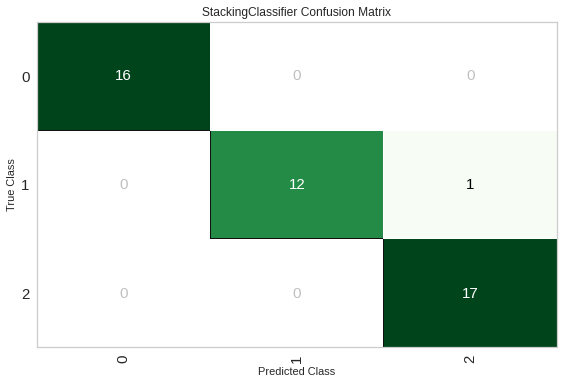

In [ ]:
plot_model(stacked_model, plot='confusion_matrix')

In [6]:
# create a model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8211,0.6842,0.6842,0.6842,0.5128,0.5128
1,0.7593,0.8376,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.6667,0.7383,0.5263,0.5263,0.5263,0.2692,0.2692
3,0.6667,0.7323,0.3158,0.5455,0.4000,0.1913,0.2050
4,0.7593,0.7789,0.5263,0.7143,0.6061,0.4384,0.4490
5,0.8148,0.8827,0.6316,0.8000,0.7059,0.5735,0.5820
6,0.7593,0.8015,0.5789,0.6875,0.6286,0.4524,0.4561
7,0.7358,0.8063,0.3889,0.7000,0.5000,0.3399,0.3670
8,0.7170,0.7429,0.7222,0.5652,0.6341,0.4089,0.4171
9,0.7170,0.8143,0.7222,0.5652,0.6341,0.4089,0.4171


In [7]:
# predict on new data
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7186,0.7975,0.5679,0.6053,0.586,0.3732,0.3736


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,Number of times pregnant_11,Number of times pregnant_12,Number of times pregnant_13,Number of times pregnant_14,Number of times pregnant_15,Number of times pregnant_17,Number of times pregnant_2,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,141.0,0.0,0.0,0.0,42.400002,0.205,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8976
1,99.0,60.0,19.0,54.0,26.900000,0.497,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9994
2,154.0,78.0,30.0,100.0,30.900000,0.164,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.9158
3,96.0,0.0,0.0,0.0,23.700001,0.190,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9897
4,125.0,86.0,0.0,0.0,37.599998,0.304,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.6382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,193.0,50.0,16.0,375.0,25.900000,0.655,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5919
227,99.0,54.0,28.0,83.0,34.000000,0.499,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9895
228,74.0,0.0,0.0,0.0,0.000000,0.102,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9896
229,128.0,78.0,0.0,0.0,21.100000,0.268,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6335


In [13]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8241,0.6842,0.7222,0.7027,0.5479,0.5484
1,0.7593,0.8105,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.6852,0.7398,0.5789,0.5500,0.5641,0.3180,0.3182
3,0.6481,0.7429,0.3158,0.5000,0.3871,0.1576,0.1658
4,0.7778,0.8090,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.8333,0.8647,0.6316,0.8571,0.7273,0.6112,0.6260
6,0.8148,0.8451,0.7368,0.7368,0.7368,0.5940,0.5940
7,0.7358,0.8238,0.4444,0.6667,0.5333,0.3592,0.3736
8,0.7547,0.7667,0.7222,0.6190,0.6667,0.4744,0.4780
9,0.7170,0.8048,0.7222,0.5652,0.6341,0.4089,0.4171


In [18]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7208, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=80, n_jobs=-1, num_leaves=200, objective=None,
               random_state=7208, reg_alpha=0.005, reg_lambda=1e-06,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [14]:
finalized_lightgbm = finalize_model(tuned_lightgbm)

In [15]:
finalized_lightgbm

LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=80, n_jobs=-1, num_leaves=200, objective=None,
               random_state=7208, reg_alpha=0.005, reg_lambda=1e-06,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)